# Introduction

# Book: The Resonant Tunneling Diode photonics: Devices and applications 2nd Edition

##Charlie Ironside, Bruno Romeira and Jose Figueiredo
# Chapter 3 RTD Current-Voltage and fit to data

Prof. Charlie Ironside
Department of Physics and Astronomy
Curtin University
Bentley Campus,
Western Australia 6102
email: Charlie.Ironside@curtin.edu.au

The first part is to set up import actual data from a current voltage (I-V)measurement on a resonant tunnelling diode - the data is plotted. The data is then fitted using manipulate function to the mode given in the following paper :-

This programme plots the current voltage curve of a resonant tunneling diode as described in the following paper:-
J. N. Schulman, H. J. D. Santos, and D. H. Chow, "Physics-based RTD current-voltage equation," IEEE Electron Device Letters, Article vol. 17, no. 5, pp. 220-222, May 1996. http://www.doi.org/10.1109/55.491835.

The meaning of the fitting parameters in given in the paper.

# Load Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy
from scipy import constants


# Import RTD I-V data


In [ ]:
URL1 ='https://www.dropbox.com/s/ipb0eg2m7cvf5sc/RTDdata.csv?raw=1' #this is the RTD I-V data
IVdata=pd.read_csv(URL1,header=None)#RTDIVdata - converts into Pandas dataframe
IVdata.columns=["Voltage","Current"]
Volts=IVdata.Voltage
Amps=IVdata.Current*1000#convert to milliamps
print('Number of data points =', len(Volts),)

Number of data points = 326


# Plot RTD-IV data

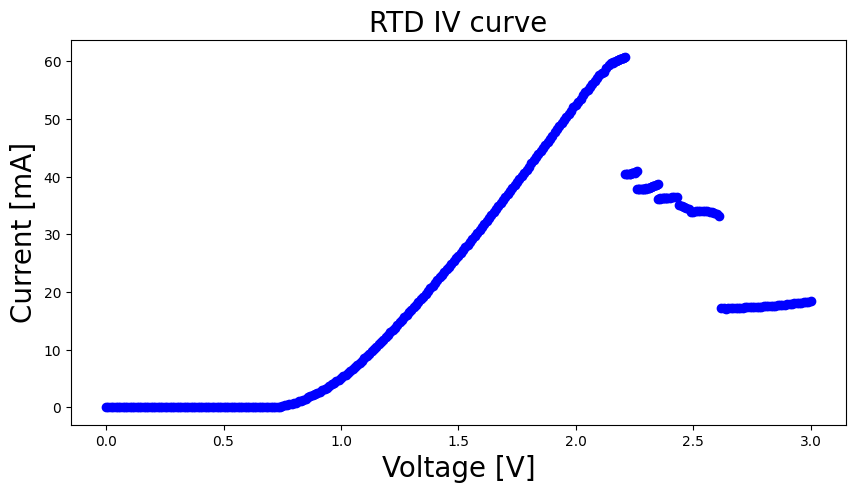

In [ ]:
#Ploting I_V curve
fig,ax=plt.subplots(1,1,figsize=(10, 5))
ax.set_title('RTD IV curve',fontsize=20)
ax.scatter(IVdata.Voltage,IVdata.Current*1000,color='b',marker='o')
ax.set_ylabel('Current [mA]',fontsize=20)
ax.set_xlabel('Voltage [V]',fontsize=20)
plt.show()

# Fit to equation

 J. N. Schulman, H. J. D. Santos, and D. H. Chow, "Physics-based RTD current-voltage equation," IEEE Electron Device Letters, Article vol. 17, no. 5, pp. 220-222, May 1996. http//www.doi.org/10.1109/55.491835.



The equations come from Schulman et al and are as follows:-

$J_1=A\times ln[\frac{1+exp((B-C+n_1V)e/kT)}{1+exp((B-C-n_1V)e/kT}))]\times [\frac{\pi} 2 + tan^{-1}(\frac{C-n_1V}{D})]$

$J_2=H\times exp(n_2Ve/kT-1)$

$J_{total}=J_1+J_2$


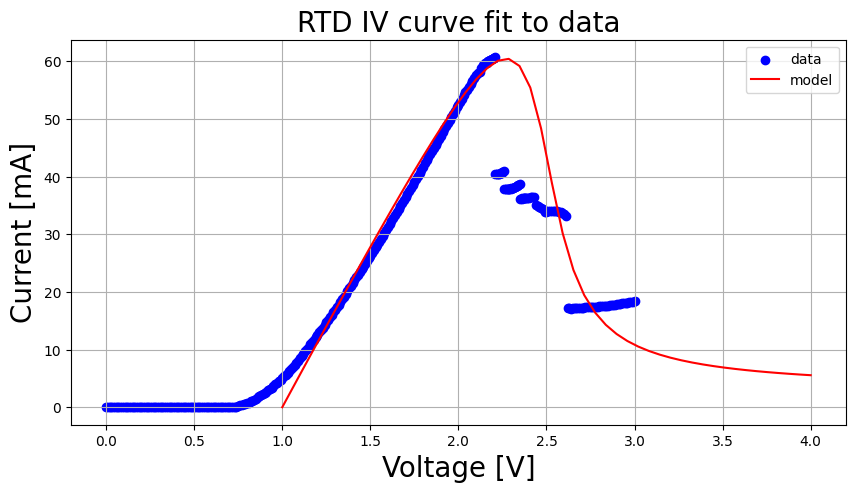

In [ ]:
def RTD_IV(T,A,H,B,C1,D1,n1,n2,offset,Volts,Amps):
  #V_start=Volts[0]
  #V_finish=Volts[len(Volts)-1]
  V_model=np.linspace(Volts[0],Volts[len(Volts)-1])
  #V_model=V_model+offset
  #get the vales of physical constants from scipy
  k=scipy.constants.k #Boltzman's constant
  e=scipy.constants.e #Charge of electron
  pi=scipy.constants.pi#pi

#Next section splits the Schulaman et al equation into a number of terms to calculate the current density,J of the RTD versus voltage
  J1_T1=np.exp(B-C1+n1*V_model*e/k/T)
  J1_T2=np.exp(B-C1-n1*V_model*e/k/T)
  J1_T3=pi/2 + np.arctan((C1-n1*V_model)/D1)
  J1_T4=np.log(J1_T1/J1_T2)
  J1_model=A*J1_T4*J1_T3
  J2_model=H*np.exp(n2*V_model*e/k/T)
  J_total=J1_model+J2_model

#plot model and compare with data
  V_model=V_model+offset
  fig,ax=plt.subplots(1,1,figsize=(10, 5))
  ax.scatter(Volts,Amps,color='b',label='data')
  ax.plot(V_model,J_total,color='r',label='model')
  ax.set_title('RTD IV curve fit to data',fontsize=20)
  ax.set_ylabel('Current [mA]',fontsize=20)
  ax.set_xlabel('Voltage [V]',fontsize=20)
  ax.legend()
  ax.grid()
  plt.show

#Adjust these parameters for best fit
T=300 #temperature
A=12.0#see the Schulaman et al equation
H=4E-5#see the Schulaman et al equation
B=0.039#see the Schulaman et al equation
C1=0.03#see the Schulaman et al equation
D1=0.003#see the Schulaman et al equation
n1=0.02#see the Schulaman et al equation
n2=0.02#see the Schulaman et al equation
offset=1.0 #offset voltage scale to get best fit to the Schulaman et al equation
#Calculate model and Plot data
RTD_IV(T=T,A=A,H=H,B=B,C1=C1,D1=D1,n1=n1,n2=n2,offset=offset,Volts=Volts,Amps=Amps)

# Calculate & Plot the differential (conductance) of the I-V curve


From the IV model calculate the conductance $\Delta I/\Delta V$ curve

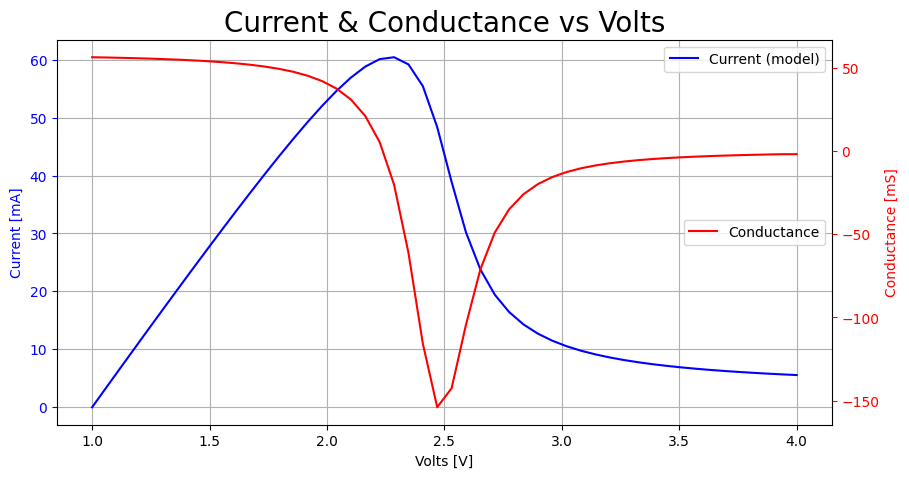

In [ ]:
import matplotlib.pyplot as plt
def RTD_conductance(T,A,H,B,C1,D1,n1,n2,offset,Volts,Amps):
  #V_start=Volts[0]
  #V_finish=Volts[len(Volts)-1]
  V_model=np.linspace(Volts[0],Volts[len(Volts)-1])
  #V_model=V_model+offset
  #get the vales of physical constants from scipy
  k=scipy.constants.k #Boltzman's constant
  e=scipy.constants.e #Charge of electron
  pi=scipy.constants.pi#pi
  #Next section splits the Schulaman et al equation into a number of terms to calculate the current density,J of the RTD versus voltage
  J1_T1=np.exp(B-C1+n1*V_model*e/k/T)
  J1_T2=np.exp(B-C1-n1*V_model*e/k/T)
  J1_T3=pi/2 + np.arctan((C1-n1*V_model)/D1)
  J1_T4=np.log(J1_T1/J1_T2)
  J1_model=A*J1_T4*J1_T3
  J2_model=H*np.exp(n2*V_model*e/k/T)
  J_total=J1_model+J2_model

  #from model calculate conductance
  J_diff=np.diff(J_total) #Finds difference between neighouring values
  V_diff=np.diff(V_model) #Finds difference between neighouring values
  diffJ=J_diff/V_diff     #calculates conductance
  diffJ=np.append(diffJ,diffJ[len(diffJ)-1])#adds value at end to make array same size as
  #diff_Resist=V_diff/J_diff
  #diff_Resist=np.append(diff_Resist,diff_Resist[len(diff_Resist)-1])

  #Plot results and compare conductance and current
  V_model=V_model+offset

  fig=plt.figure(figsize=(10, 5))
  ax=fig.add_subplot(111, label="1")
  ax2=fig.add_subplot(111, label="2", frame_on=False)
  ax.grid()
  ax.set_title('Current & Conductance vs Volts',fontsize=20)
  ax.plot(V_model,J_total, color="b",label='Current (model)')
  ax.set_xlabel("Volts [V]", color="k")
  ax.set_ylabel("Current [mA]", color="b")
  ax.tick_params(axis='x', colors="k")
  ax.tick_params(axis='y', colors="b")

  ax2.plot(V_model,diffJ,color="r",label='Conductance')
  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_ylabel("Conductance [mS]", color="r")
  ax2.yaxis.set_label_position('right')
  ax2.tick_params(axis='x', colors="r")
  ax2.tick_params(axis='y', colors="r")
  ax2.set_xticks([])
  ax.legend(loc='upper right')
  ax2.legend(loc='center right')
  plt.show()
RTD_conductance(T=T,A=A,H=H,B=B,C1=C1,D1=D1,n1=n1,n2=n2,offset=offset,Volts=Volts,Amps=Amps)